# Airline Passenger Satisfaction
<img src="https://drive.google.com/uc?id=1HvDJElliYQKbdyiCQXsoKdjC8KefRoSL" alt="aitplane in the skies" style="width:500px;"/>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import ipydatagrid
import seaborn as sns
import bqplot as bqp

## I. Boarding (Introduction/background):

Tired of the constant flight delays? Confused about how to book your flight ticket online? Fed up with the mediocre Food and Drink service offered on-board? Perhaps, on the contrary, you are happy with the comfort of your seat, the spaciousness of the leg room, or the variety of in-flight entertainment provided by your airline. Which of these factor(s) matter to you the most, the consumer?
Look no further! We have the answers right here for you!



In our analysis of Airline Passenger Satisfaction, we look at various, different variables affecting customer satisfaction, namely Age, Flight Distance, Departure Delay, Arrival Delay, Departure and Arrival Time Convenience, Ease of Online Booking, Check-in Service, Online Boarding, Gate Location, On-board Service, Seat Comfort, Leg Room Service, Cleanliness, Food and Drink, In-flight Service, In-flight Wifi Service, In-flight Entertainment, and Baggage Handling, with the ultimate goal of trying to determine and understand the factors that contribute most to customer satisfaction.
In our expedition through Exploratory Data Analysis (EDA), we examine, for example, the different data types and the idiosyncratic nature of our attributes. Utilizing assorted charts and graphs, we can visually analyze the distribution of our dataset and scrutinize closely the relationships among the different variables. By uncovering and interpreting patterns in our dataset during EDA, it will help us understand potential risks or trends the models will create in the Modeling phase. 
In the Modeling phase, we use a classification model, namely Logistic Regression, to finally make a prediction about the factors that matter most to customer satisfaction. We will consider different logistic regression techniques, compare their results, and use the most effective one for our model. 
Excited to embark on this data exploratory journey? So are we! Now sit back, relax, and enjoy the flight! Satisfaction guaranteed!

Before we “take off” on our data exploration flight, we import our airline_passenger_satisfaction.csv file, which can be located on Kaggle’s website: https://www.kaggle.com/datasets/mysarahmadbhat/airline-passenger-satisfaction

In [2]:
airlines_df = pd.read_csv("airline_passenger_satisfaction.csv")

## II. Take-Off (Exploratory Data Analysis)

Now, as our flight glides on the runway and climbs into the sky of EDA, we take a quick look at the individual features, their Non-Null Count (to discover if there are any NULLs in the dataset), and their data type, which is useful later on when we need to manipulate our dataset.

In [3]:
# Quick overview of the columns and their types
airlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

Of course, no data analysis is complete without checking the summary statistics of our dataset. It summarizes the central tendency, dispersion shape of a dataset’s distribution, excluding any NaN values. 

In [4]:
# Summary statistics
airlines_df.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Earlier, when we looked at the Non-Null Count of each feature, we noticed that the “Arrival Delay column had some NULL values. Let’s look at it using a heatmap!

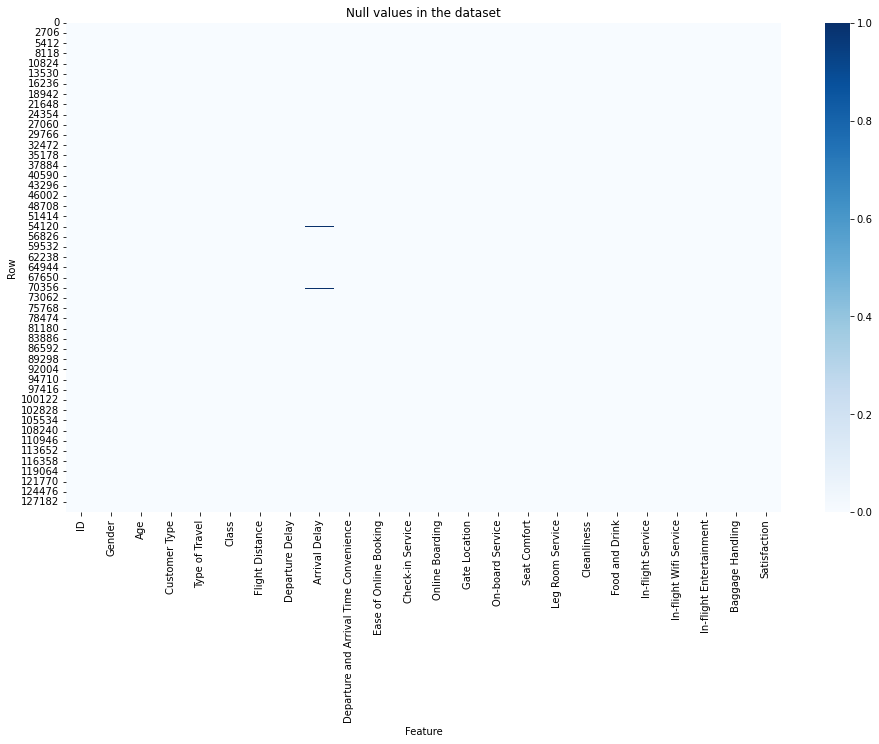

In [5]:
# Checking for NaN values
plt.figure(figsize=(16,9))
plt.title("Null values in the dataset")
ax = sns.heatmap(airlines_df.isna().astype(int), cmap='Blues');
ax.set_xlabel("Feature")
ax.set_ylabel("Row");

We sum up all the NULL value for each column and we noticed that there are 393 NULL values.

In [6]:
airlines_df.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

We look at the “Arrival Delay” column in detail, focusing in on the instances where we have NaN values. Given that we have 393 NULL instances out of 129,880 instances, which is only 0.30%, we decided that the immateriality of the NULL instances warrant dropping those rows altogether so that we can solely focus on the rows with complete information. <span style="font-weight: bold;">Given we have only 393 rows with NaN for Arrival Delay, we can probably drop all NaN rows without much impact on the overall analysis</span>

In [7]:
# Examine data with null values
airlines_df[airlines_df['Arrival Delay'].isnull()]

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
246,247,Male,11,Returning,Business,Business,719,38,NaN,1,...,4,4,3,4,4,3,4,4,4,Neutral or Dissatisfied
883,884,Male,39,Returning,Business,Business,396,0,NaN,3,...,3,4,3,3,3,3,3,3,3,Satisfied
1965,1966,Male,36,Returning,Business,Economy,383,2,NaN,4,...,5,2,2,2,2,2,2,2,3,Satisfied
2407,2408,Female,55,Returning,Business,Business,2904,58,NaN,5,...,4,3,4,4,5,4,4,4,4,Neutral or Dissatisfied
2448,2449,Male,21,Returning,Personal,Economy Plus,767,5,NaN,3,...,4,1,2,1,1,2,1,1,1,Neutral or Dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129000,129001,Male,46,First-time,Business,Business,2704,7,NaN,3,...,4,4,2,4,4,4,3,4,3,Neutral or Dissatisfied
129003,129004,Female,17,First-time,Business,Economy,2704,0,NaN,3,...,2,1,4,1,1,3,3,1,4,Neutral or Dissatisfied
129014,129015,Male,57,Returning,Business,Business,2704,0,NaN,4,...,4,4,4,5,2,4,4,4,4,Satisfied
129015,129016,Female,22,Returning,Business,Business,2611,8,NaN,3,...,4,4,3,4,4,4,3,4,3,Satisfied


In [8]:
airlines_df.dropna(inplace=True)

Next, as we settle in on our flight, we look at the age distribution by gender. We can see that the distribution of the data between male and female is very similar in our dataset. Notice the rather interesting dip in frequency for travellers between ages ~25 to ~35.

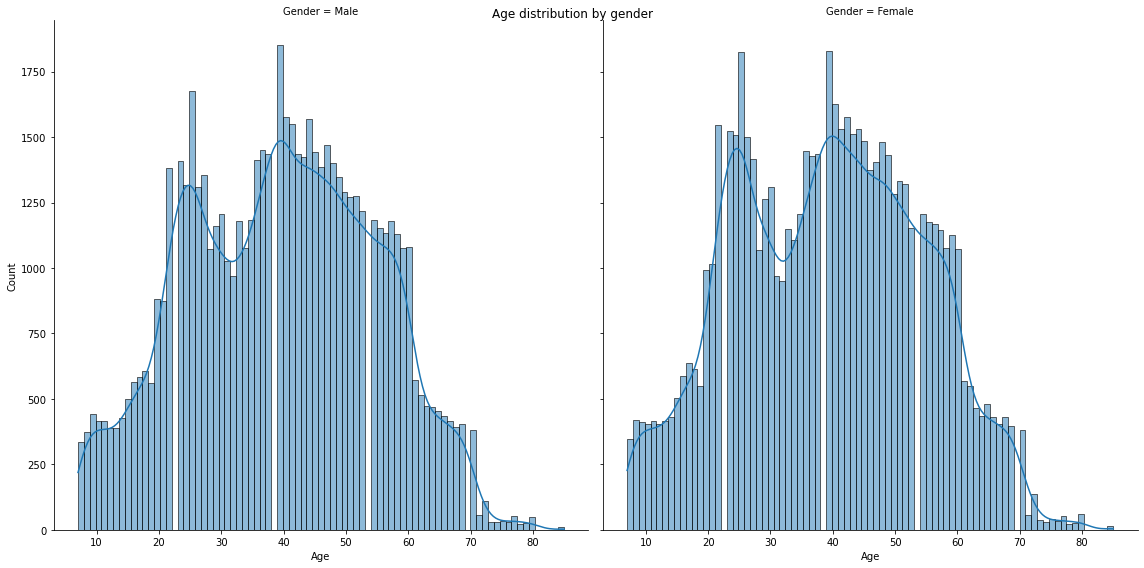

In [9]:
# Distribution of ages by gender
# plt.title("Age distribution by gender")
fig = sns.displot(airlines_df, x='Age', kind='hist', col='Gender', kde=True, height=8, aspect=1)
fig.fig.suptitle('Age distribution by gender');

To better visualize the similarity in the distribution between male and female, we binned the age by gender: <= 14, 15-24, 25-64, and >65

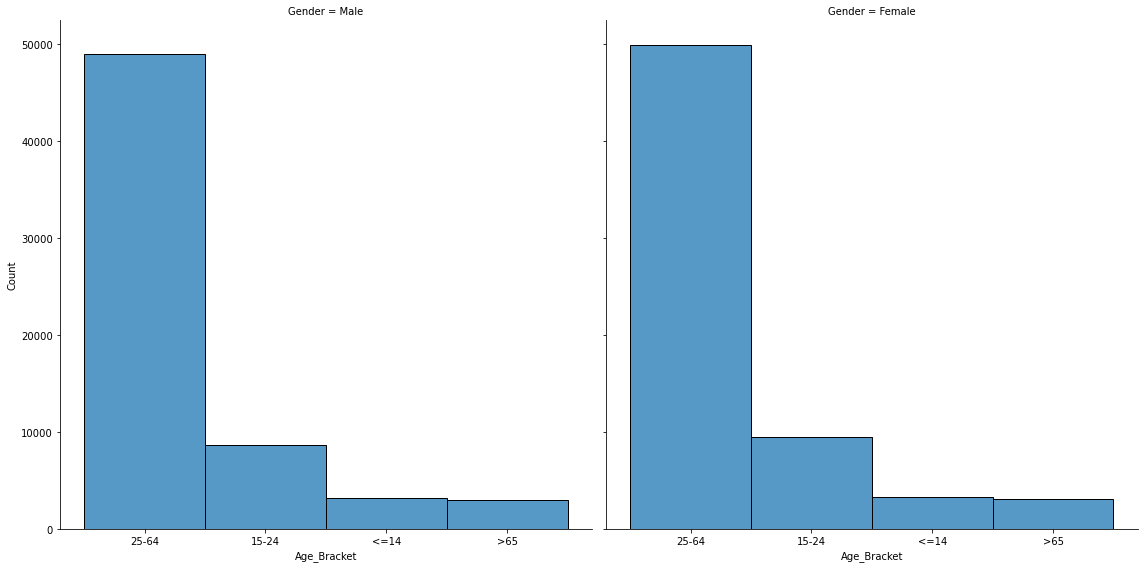

In [10]:
# Age by bracket
def get_age_bracket(age):
    if age <= 14:
        return "<=14"
    elif age >= 15 and age <= 24:
        return "15-24"
    elif age >=25 and age <= 64:
        return "25-64"
    else:
        return ">65"
airlines_df['Age_Bracket'] = airlines_df["Age"].apply(get_age_bracket)
sns.displot(airlines_df, x='Age_Bracket', kind='hist', col='Gender', kde=False, height=8, aspect=1);

Next, since we were just looking at the count of each gender by age (and by age bracket), we look at the spread for the Satisfaction feature by age. We noticed that there are a lot more younger people who are “Neutral or Dissatisfied” with airlines, while there are slightly more older people who are “Satisfied” with airlines, based on the scores of the various features that were evaluated. 
We definitely have a lot of work to do in the airline industry to satisfy and appeal to the younger folks!

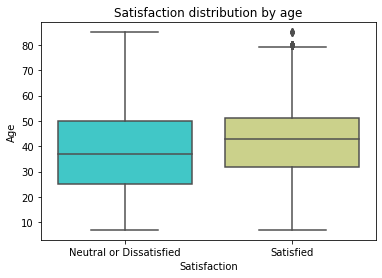

In [11]:
# Relationship between satisfaction and age
plt.title("Satisfaction distribution by age")
sns.boxplot(data=airlines_df, x="Satisfaction", y="Age", palette="rainbow");

We now plot Satisfaction by age bracket, using the same binning strategy as we used above. Using binning allows us to determine that there is actually a lot of work to do for the airline industry across all age brackets when it comes to customer satisfaction!

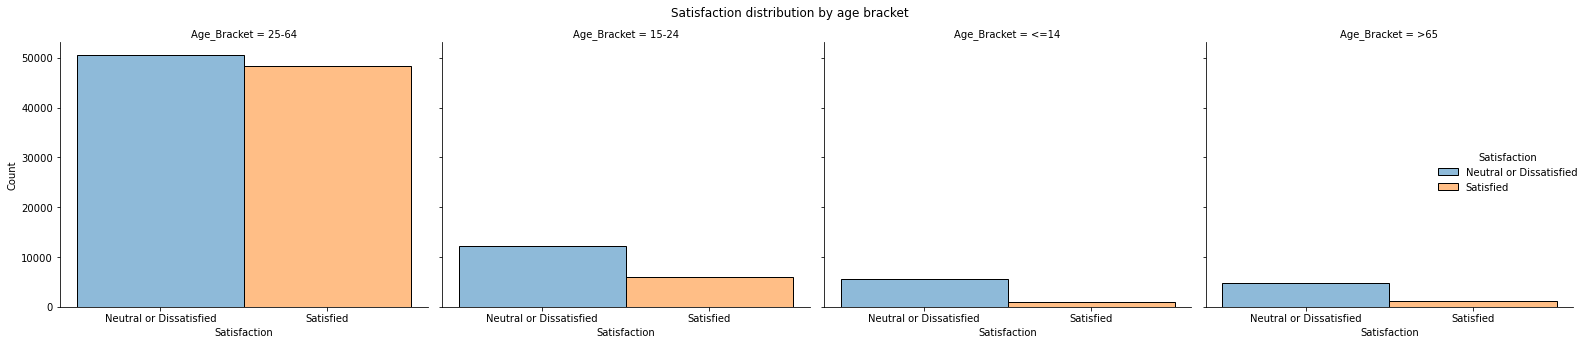

In [12]:
# Relationship between satisfaction and age bracket
# sns.countplot(data=airlines_df, x="Satisfaction")
fig = sns.displot(airlines_df, x='Satisfaction', kind='hist', col='Age_Bracket', kde=False, hue="Satisfaction");
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.fig.suptitle('Satisfaction distribution by age bracket');

This plot confirms our understanding: it shows that we have a bit more “Neutral or Dissatisfied” customers than “Satisfied” Customers. But this is still a relatively balanced sample.

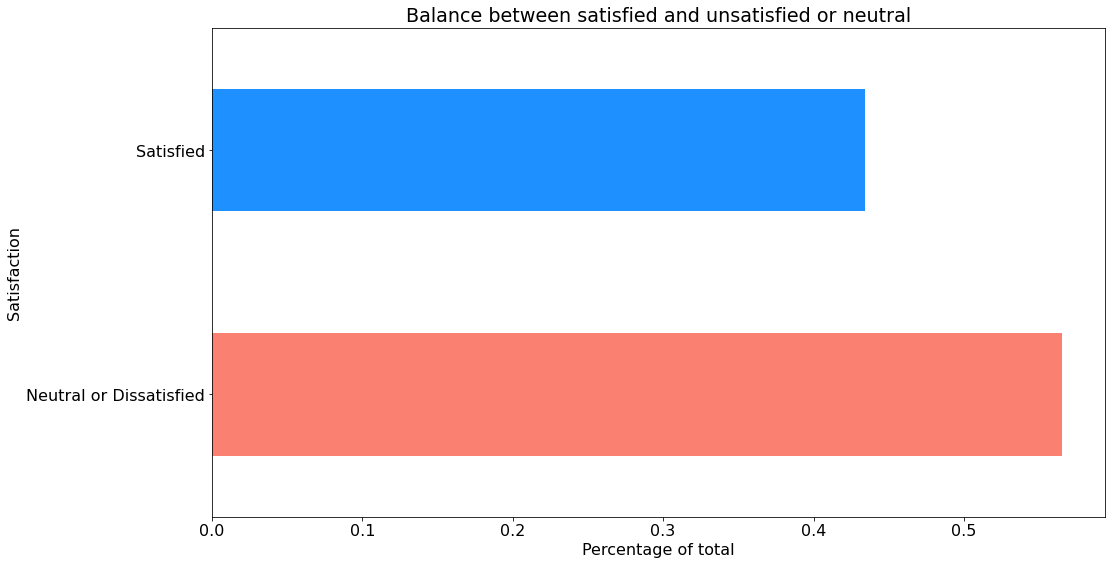

In [13]:
# Balance between satisfied and unsatisfied customers
plt.rcParams['font.size'] = '16'
fix, ax = plt.subplots(figsize=(16,9))
ax.axes = airlines_df['Satisfaction'].value_counts(normalize=True).plot(kind="barh", color=['salmon', 'dodgerblue'])
ax.set_xlabel("Percentage of total")
ax.set_ylabel("Satisfaction")
plt.title("Balance between satisfied and unsatisfied or neutral");

We next create a Feature Correlation Matrix, which allows us to evaluate the direction as well as the strength of a relationship between variables. Look at the huge correlation between Departure Delay vs Arrival Delay! Overall there is some multicollinearity, but is it too much so that it affects the quality of our modeling? We will find out soon enough!

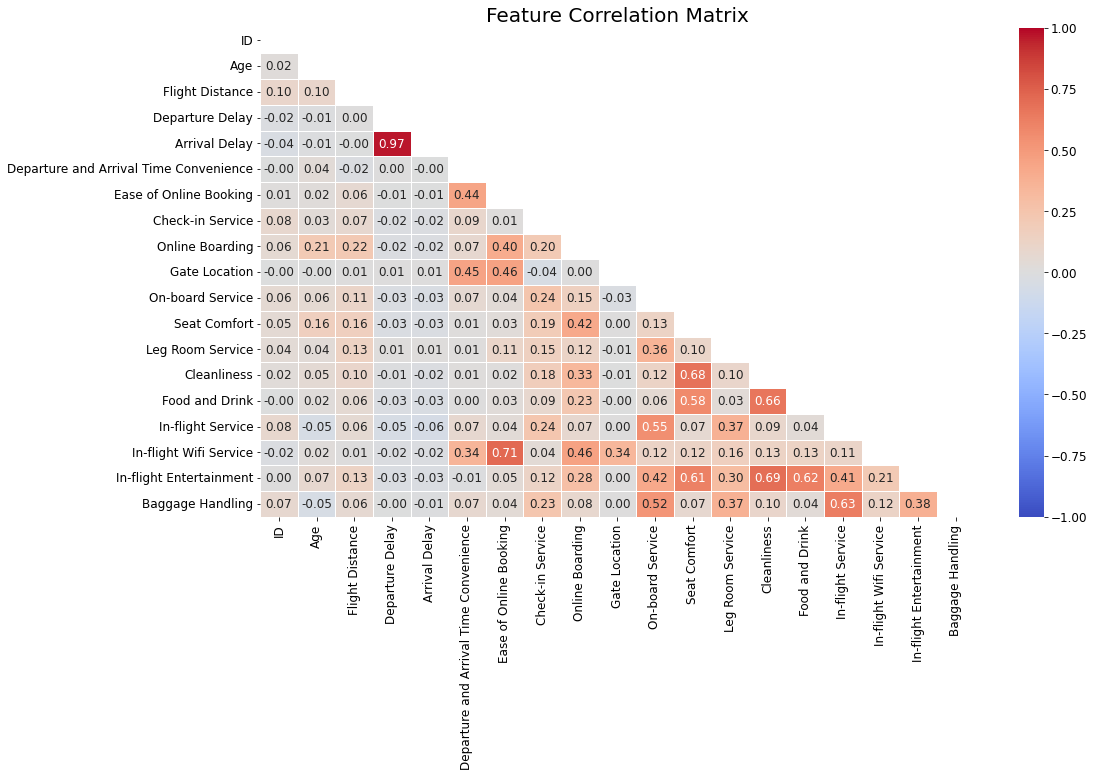

In [14]:
mask = np.zeros_like(airlines_df.corr(), dtype=np.bool_)
mask[np.triu_indices_from(mask)]= True

plt.figure(figsize=(16,9))
plt.rcParams['font.size'] = '12'
plt.title("Feature Correlation Matrix", fontsize=20)
sns.heatmap(airlines_df.corr(), annot=True, mask=mask, linewidths=.5, vmin=-1, vmax=1, fmt=".2f", cmap='coolwarm');

Don’t get out of your seats just yet! The seatbelt sign is still on! We turn on the In-flight entertainment system to view our Interactive EDA

## Interactive EDA

The interactive data explorer is designed to give you, the consumer of this notebook, flexibility in ease of exploring the data set without having to write code. We can answer a lot of questions quickly, just by selecting the the parameters we want and letting the filtering and aggregation mechanisms do the explaining, visually, for us. The Interactive Data Explorer is comprised of three parts:
1. Control panel
2. Interactive datagrid
3. Interactive scatter chart

The control panel is comprised of a number of selectors:
* Range slider for filtering the main dataframe based on an age range
* Dropdown menu for selecting, and filtering the dataset based on gender
* Dropdown for selecting the x-axis of the scatter plot
* Dropdown for selecting the y-axis of the scatter plot

The datagrid is a fully interactive widget which supports filtering and sorting from the UI layer or programmatically. The filtering/sorting menu is available on each column header - please do try it out!

The scatter chart is based on OpenGL and can render thousands of points. This is particularly appealing for datasets such as the one we have as it allows us to get a bird's eye view of our dataset and its features. The scatter chart supports panning and zooming. Great when you want to zoom in or out to get a more granular view! 

For the best user experience, we recommend that you right click anywhere in the Interactive Data Explorer region and select "Create new view for output". This will open up a new tab with the the Interactive Data Explorer view, and you will be able to keep it open and in fixed position without needing to scroll up and down to see the full application!

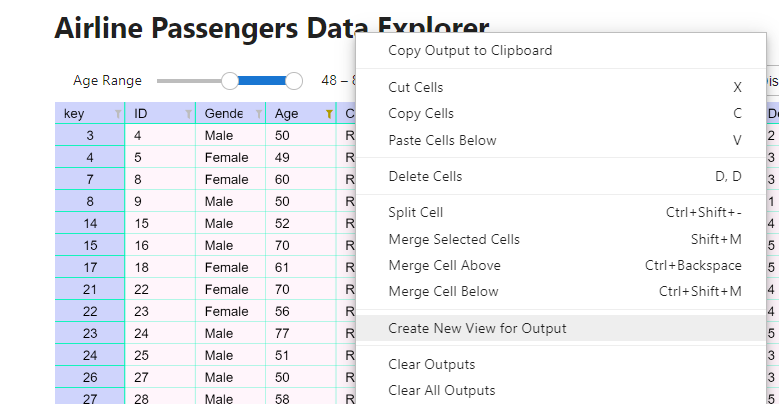
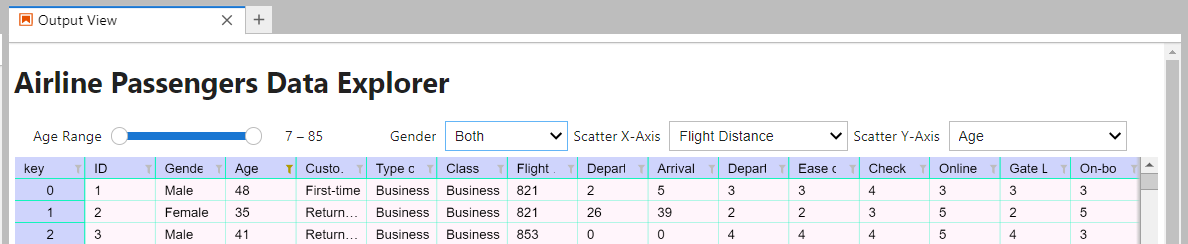

The datagrid and scatter chart should react to changes in the selections or values of the range slider and dropdown menus. Changes may take up to a second to show.

In [15]:
# Setting up a datagrid
grid = ipydatagrid.DataGrid(airlines_df)

# Some theming to add some color
cotton_candy = {
    "background_color": "rgb(255, 245, 251)",
    "header_background_color": "rgb(207, 212, 252, 1)",
    "header_grid_line_color": "rgb(0, 247, 181, 0.9)",
    "vertical_grid_line_color": "rgb(0, 247, 181, 0.3)",
    "horizontal_grid_line_color": "rgb(0, 247, 181, 0.3)",
    "selection_fill_color": "rgb(212, 245, 255, 0.3)",
    "selection_border_color": "rgb(78, 174, 212)",
    "header_selection_fill_color": "rgb(212, 255, 239, 0.3)",
    "header_selection_border_color": "rgb(252, 3, 115)",
    "cursor_fill_color": "rgb(186, 32, 186, 0.2)",
    "cursor_border_color": "rgb(191, 191, 78)",
}

grid.grid_style = cotton_candy

In [16]:
# Define widgets and variables
numerical_cols = airlines_df.select_dtypes([int, float]).columns.tolist()
age_range = (airlines_df['Age'].min(), airlines_df['Age'].max())
columns_index = {k:grid._column_name_to_index(k) + 1 for k in airlines_df.columns}
range_slider = widgets.IntRangeSlider(min=age_range[0], max=age_range[1], value=age_range, description="Age Range")
gender_dropdown = widgets.Dropdown(options=airlines_df['Gender'].unique().tolist() + ["Both"], 
                                   value="Both", layout={"width":"200px"}, description="Gender")
scatter_x_dropdown = widgets.Dropdown(options=numerical_cols, 
                                      value=numerical_cols[2], layout={"width":"250px"}, description="Scatter X-Axis")
scatter_y_dropdown = widgets.Dropdown(options=numerical_cols, value=numerical_cols[1], 
                                      layout={"width":"250px"}, description="Scatter Y-Axis")

# Chart
sc_x = bqp.LinearScale()
sc_y = bqp.LinearScale()
scatt = bqp.ScatterGL(
    x=airlines_df[scatter_x_dropdown.value].values,
    y=airlines_df[scatter_y_dropdown.value].values,
    names=np.arange(10),
    scales={"x": sc_x, "y": sc_y},
    colors=["purple"],
)
ax_x = bqp.Axis(scale=sc_x, label=scatter_x_dropdown.value)
ax_y = bqp.Axis(scale=sc_y, orientation="vertical", tick_format="d", label=scatter_y_dropdown.value)
fig = bqp.Figure(marks=[scatt], axes=[ax_x, ax_y], padding_x=0.025, interaction=bqp.interacts.PanZoom(scales={'x': [sc_x], 'y': [sc_y]}),
                 title="Select axes from the dropdown boxes!")


# Callback functions
def filter_gender(e):
    with grid.hold_sync():
        selected_gender = e.get("new")
        if selected_gender == "Both":
            grid._transforms = list(filter(lambda x: x['columnIndex'] != columns_index.get("Gender"), grid._transforms))
            update_scatter_chart(None)
            return 

        grid.transform([
            {"type": "filter", "operator": "=", "columnIndex": columns_index.get("Gender"), "value": selected_gender},
            {'type': 'filter', 'columnIndex': columns_index.get("Age"), 'operator': 'between', 'value': range_slider.value}
        ])
        update_scatter_chart(None)
    
def filter_age(e):
    with grid.hold_sync():
        start_age, end_age = e.get("new")
        grid.transform([
            {'type': 'filter', 'columnIndex': columns_index.get("Age"), 'operator': 'between', 'value': (start_age, end_age + 1)}
        ])
        update_scatter_chart(None)
    
def update_scatter_chart(e):
    with scatt.hold_sync():
        data = grid.get_visible_data()
        scatt.x = data[scatter_x_dropdown.value].values
        scatt.y = data[scatter_y_dropdown.value].values
        sc_x.min = float(data[scatter_x_dropdown.value].min())
        sc_x.max = float(data[scatter_x_dropdown.value].max())
        sc_y.min = float(data[scatter_y_dropdown.value].min())
        sc_y.max = float(data[scatter_y_dropdown.value].max())
        ax_x.label = scatter_x_dropdown.value
        ax_y.label = scatter_y_dropdown.value
        fig.title = f"{scatter_x_dropdown.value} vs. {scatter_y_dropdown.value}"
    
# Event handlers    
gender_dropdown.observe(filter_gender, names=['value'])
range_slider.observe(filter_age, names=['value'])
scatter_x_dropdown.observe(update_scatter_chart, names=["value"])
scatter_y_dropdown.observe(update_scatter_chart, names=["value"])
grid.observe(update_scatter_chart, names=["_transforms"])


# Layout container for both grid and widgets
interactive_data_explorer = widgets.VBox([
    widgets.HTML(value="<h1>Airline Passengers Data Explorer</h1>"),
    widgets.HBox([
        range_slider, gender_dropdown, scatter_x_dropdown, scatter_y_dropdown
    ], layout=widgets.Layout(flex='1 1 auto', width='100%')),
    grid,
    fig
])

Now what you have your highly sophisticated entertainment system in place, let's do some explorations!

The default view starts no filter on the age range or gender, and the selected features are Flight Distance on the y-axis and Age on the x-axis.
- One interesting observation we can see right off the bat, is the rather interesting gap in data for ages 81-84 (inclusive). Our dataset does not seem to include that age range, which is probably a data collection issue more than anything systemic. 
- On the x-axis, if we pan to the right, we can see that we also have significantly less data points for long-haul flight over 4000 miles.
- Another interesting observation is how, for ages ~73 and above, the density flights declines as the flight distance increases. It appears seniors do not enjoy long haul flights, which is expected. 

Next, we want to look at the Flight Delay distribution for young people aged 18-22 who fly economy. 
- We start by narrowing down the age range to 18-22 via the range slider. 
- We then want to filter for flights in Economy and Economy Plus, but we don't have a dropdown for that feature! Thankfully it's not a problem as we can filter directly from the grid's UI by clicking on the filter icon on the "Class" column header and "filter by value", and ticking the relevant boxes.
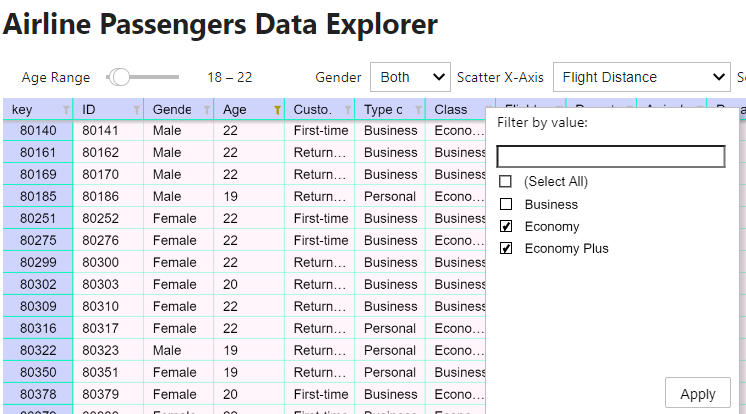
- Finally, we select Flight Distance for the x-axis, and Departure Delay for the y-axis of the scatter chart

We can see that the shorter flights flown by people ages 18-22 in Economy clas have more, often longer delays with the higher delay being close to 550 minutes for a 250 mile flight. The overall trend is that departure delay declines with the flight distance for that group. The distribution looks somewhat logarithmic, with the peaknedness being between the 0-600 miles range, and a long tail tapering off as the flight distance increases.

In [17]:
interactive_data_explorer

## III. In-Flight (Modeling)

Enjoying the flight? We definitely hope you are! Below, you will find all of the “on-board” modeling amenities that cater to all you modeling aficionados! 

In [18]:
from sklearn.model_selection import train_test_split

Before we start train/test splitting, we need to reason about the kind of analysis we want to do, and whether the data, in its current form, is suitable.
The obvious target for this dataset, given we're dealing with passenger satisfaction with a given airline, would be to to predict whether a potential
passenger would be satisfied or neutral/unsatisfied given some paramaters like their age, sex, travel class, flight delay etc.

This type of analysis lends itself nicely to Logistic Regression, which could be the ideal model to use for this analysis, with this dataset.
To use logistic regression, we are likely going to need to One-Hot Encode categorical series so they're represented as numbers.

In [19]:
airlines_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129487 non-null  int64  
 1   Gender                                  129487 non-null  object 
 2   Age                                     129487 non-null  int64  
 3   Customer Type                           129487 non-null  object 
 4   Type of Travel                          129487 non-null  object 
 5   Class                                   129487 non-null  object 
 6   Flight Distance                         129487 non-null  int64  
 7   Departure Delay                         129487 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129487 non-null  int64  
 10  Ease of Online Booking                  1294

As such, we examine the columns that may contain categorical data. We see that the attributes Gender, Customer Type, Type of Travel, Class, Satisfaction, and Age_Bracket are considered categorical data.

In [20]:
# Columns with categorical data
airlines_df.select_dtypes(["object"]).head(3)

,Gender,Customer Type,Type of Travel,Class,Satisfaction,Age_Bracket
0,Male,First-time,Business,Business,Neutral or Dissatisfied,25-64
1,Female,Returning,Business,Business,Satisfied,25-64
2,Male,Returning,Business,Business,Satisfied,25-64


Below, we create a new dataframe which has all categorical values encoded to integers. We will use that dataframe to train and test our models.

In [21]:
from sklearn.preprocessing import LabelEncoder

# Function to retrieve the string to integer mapping used in One-Hot encoding
def get_encoding_mapping(encoded_series, types):
    return dict(zip(encoded_series.classes_, encoded_series.transform(types)))

# Creating a copy of the airlines dataframe, as we will encode and replace 
# categorical columns with their numerical equivalents
airlines_df_encoded = airlines_df.copy()

# Mapping dictionary to convert back from encoding to string - will be used later!
enc_mappings = []

for col in airlines_df_encoded.select_dtypes(["object"]).columns:
    # One-Hot encoding categorical columns
    cur_series = airlines_df_encoded[col]
    col_enc = LabelEncoder()
    col_enc.fit(cur_series)
    col_unique_vals = cur_series.unique().tolist()
    enc_mappings.append(get_encoding_mapping(col_enc, col_unique_vals))
    airlines_df_encoded[col] = col_enc.transform(cur_series)

In [22]:
# Checking the conversion succeeded
airlines_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129487 non-null  int64  
 1   Gender                                  129487 non-null  int64  
 2   Age                                     129487 non-null  int64  
 3   Customer Type                           129487 non-null  int64  
 4   Type of Travel                          129487 non-null  int64  
 5   Class                                   129487 non-null  int64  
 6   Flight Distance                         129487 non-null  int64  
 7   Departure Delay                         129487 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129487 non-null  int64  
 10  Ease of Online Booking                  1294

In [23]:
# The 'ID' columns is unlikely to be useful for our model, so we will drop it.
airlines_df_encoded = airlines_df_encoded.drop('ID', axis=1)

After utilizing one hot encoding for our categorical columns, and dropping the ID column, our data is now in the right shape to be used as an input to a Machine Learning Model! Recall that some columns had very high positive/negative correlation. We should keep an eye on those and potentially drop some of them as inputs so that we can reduce the amount of multicollinearity in the model
Now we will use the inputs, feature_list, as our X variable, and the Satisfaction column, our prediction, as the y variable. We then use train_test_split based on the default parameters (i.e. test_size = 0.33, random_state = 42) specified in scikit-learn.
.

In [24]:
# Columns used to predict "Satisfaction"
feature_list = list(filter(lambda x: x != 'Satisfaction', airlines_df_encoded.columns.tolist()))

In [25]:
# Define regressor and regressand
y = airlines_df_encoded[['Satisfaction']]
X = airlines_df_encoded[feature_list]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
# Sanity check everything looks okay
display(X_train.head(3))

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Age_Bracket
56176,0,21,1,1,1,1400,5,0.0,4,4,...,3,2,4,2,2,5,4,2,3,0
89346,0,60,0,0,1,1587,0,11.0,1,1,...,3,2,3,2,2,3,1,2,3,1
31640,1,50,1,0,1,846,0,0.0,4,4,...,2,4,3,4,4,4,4,4,5,1


Now for our inflight service, we are ready to instantiate and fit our model! But before we do that, we define a helper function which can standardize the way we fit, train, and score our models to reduce code duplication and the potential for operational errors. The general “run_model” function that we have defined will be used to fit and train our various models and calculate, for each model, the performance metrics such as accuracy, roc_auc score, confusion matrix, as well as the precision (True Positive/True Positive + False Positive), recall (True Positive/ True Positive + False Negative), F-measure ((2 * Recall * Precision)/(Recall + Precision)), and support for each class.

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, accuracy_score, roc_auc_score, classification_report

def run_model(model, X_train, X_test, y_train, y_test, print_results=True):
    # Convert to 1D arrays as some of the sklearn functions require them    
    y_train = y_train.values.ravel()
    y_test = y_test.values.ravel()
    
    # Fit our and train our model     
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    if print_results:
        print(f"Accuracy:{accuracy}, ROC AUC: {roc_auc}")
        print(classification_report(y_test,y_pred,digits=5))
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 7))
        cmd = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax1)
        rocd = RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax2)
    
    return model, accuracy, roc_auc

We can also add a function for inspecting the regression coefficients for LogisticRegression, so we can get more insight about the relevance of our features. This function is defined below.

In [28]:
import statsmodels.api as sm

def infer_logistic_regression_coefs(y_train, X_train):
    logit_model = sm.Logit(y_train, X_train)
    result = logit_model.fit()
    print(result.summary())

<span style="font-weight: bold">DISCLAIMER: with all of the models below, the ROC AUC cruve shown in stdout is calculated from predictions, whilst the AUC score shown in the curve chart is calculated from estimators. These two methods tend to have a slight differential between them, so if you notice the numbers being different between the two - that's why. Both calculations are provided by scikit-learn (we did not implement them ourselves).

#### Logistic Regression

One of the “modeling amenities” that we offer on-board this flight includes Logistic Regression (with no penalty), which estimates the probability that the customer is either Neutral/Dissatisfied (0) or Satisfied (1) with the airline, based on the variables we have provided. Logistic regression utilizes the logistic sigmoid function $f(x)=\frac{1}{{1+e}^{-x}}$ to weighted input values to generate a prediction of the data class.

We run a maximum of 4,000 iterations, which yields an accuracy score of .874 and an ROC AUC score of .870. Based on the numbers, it seems that Logistic Regression does a decent job at prediction and at distinguishing between classes.


Accuracy:0.8740960894900658, ROC AUC: 0.8697531830129747
              precision    recall  f1-score   support

           0    0.87757   0.90316   0.89018     24143
           1    0.86927   0.83635   0.85249     18588

    accuracy                        0.87410     42731
   macro avg    0.87342   0.86975   0.87134     42731
weighted avg    0.87396   0.87410   0.87379     42731



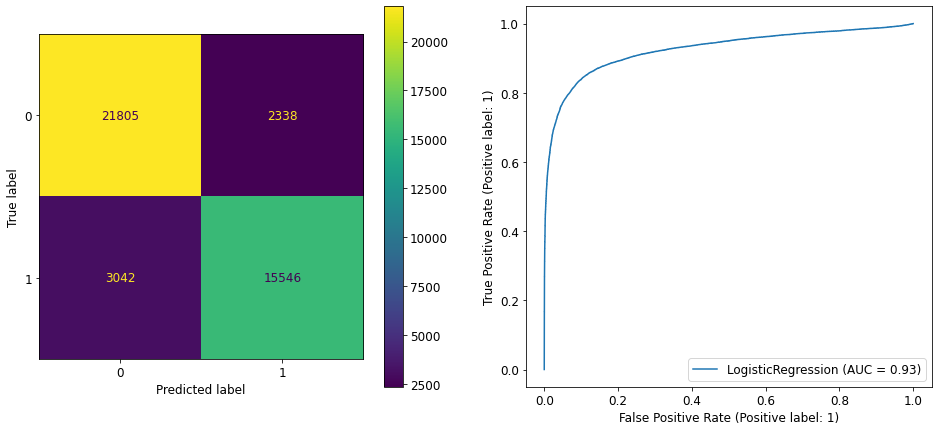

In [29]:
from sklearn.linear_model import LogisticRegression

# Running our model (using a higher number of iteration to maximize chance of model convergence)
lg_model, lg_accuracy, lg_roc_auc = run_model(LogisticRegression(max_iter=4000, random_state=42), X_train, X_test, y_train, y_test);

<span style="font-weight: bold;">Some additional statistics. Looking into the regression model and determining which features are important and affect our regression.</span>

Below, we build the Logistic model and fit the data using Statsmodels, which is a Python module that provides various functions for estimating different statistical models and performing statistical tests. Specifically, we are looking at the summary table of our Logistic regression. Notice that we are using Maximum Likelihood Estimation (MLE) to optimize the parameters and that it has converged as an optimization (i.e. converged = True). For the Logit Regression, there is not really a true R squared value so it uses a “pseudo R-squared” calculation. When we look at the coefficients of each of our variables and their associated p values (i.e. P>|z|), they are all very small (close to 0 in this case). Thus, we can infer that the coefficients of the variables are significant. Moreover, we can see that the z values are derived by dividing the coefficient by the standard error.

In [30]:
infer_logistic_regression_coefs(y_train, X_train)

Optimization terminated successfully.
         Current function value: 0.394624
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           Satisfaction   No. Observations:                86756
Model:                          Logit   Df Residuals:                    86733
Method:                           MLE   Df Model:                           22
Date:                Sat, 20 Aug 2022   Pseudo R-squ.:                  0.4235
Time:                        19:02:23   Log-Likelihood:                -34236.
converged:                       True   LL-Null:                       -59382.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Gender                                    -0.2032   

From above, we computed the accuracy score and the ROC AUC score of Logistic Regression to be .875 and .871, respectively. Now we will add a regularization term to avoid any instance of overfitting. We start with L1 ratio of 1, which means we’re looking at full Lasso regression. In scikit-learn, ElasticNet regularized Logistic Regression must be performed using the “saga” solver.
We can see that after adding a regularization term, the accuracy of the classifier drops to 0.713 and the ROC AUC score drops to .705. However, note the <span style="color: red">convergence warning</span> below, which states that the solver was not able to converge. This is the case because the Logistic Regression models with regularization are not scale invariant; regularization makes the predictor dependent on the scale of the features, a fact which helps to explain the drop in both the accuracy score and the ROC AUC score.


<span style="font-weight: bold;">Let's add regularization. We will start with L1 ratio of 1, which means we're looking at full Lasso regression. In scikit-learn, ElsticNet regularized logistic regression must be performed using the "saga" solver.</span>

/home/idafna/micromamba/envs/cis545/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy:0.7130654559921369, ROC AUC: 0.7050786166040426
              precision    recall  f1-score   support

           0    0.73641   0.76652   0.75116     24143
           1    0.67973   0.64364   0.66120     18588

    accuracy                        0.71307     42731
   macro avg    0.70807   0.70508   0.70618     42731
weighted avg    0.71176   0.71307   0.71203     42731



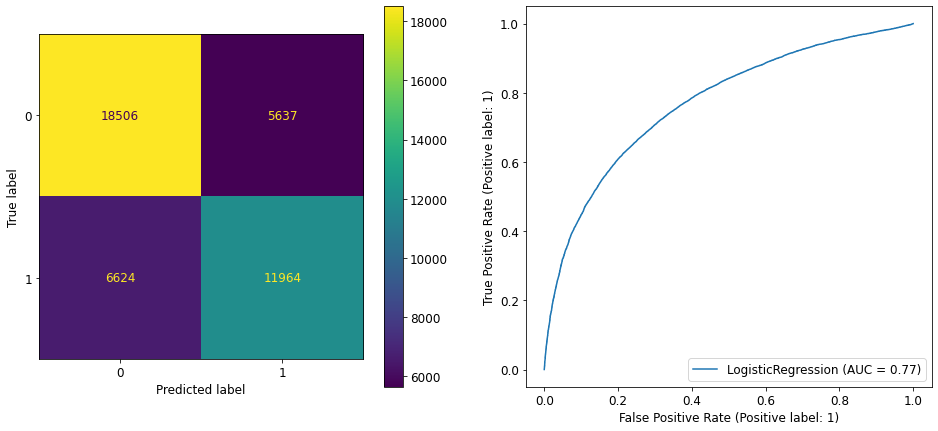

In [31]:
_, _, _ = run_model(LogisticRegression(penalty="elasticnet", l1_ratio=0.5, solver="saga", random_state=42), X_train, X_test, y_train, y_test);

Now, to overcome this deficiency, we run the StandardScaler, which is part of the scikit-learn pre-processing package, on the Logistic Regression with l1 penalty, where the scaler standardizes all the features by removing the mean and scaling to unit variance. Moreover, notice that we also used the Pipeline construction in scikit-learn, which allows us to assemble several steps that can be cross-validated together. 
The solver is able to converge and we are getting a better result compared to the cell above. Now, by utilizing the StandardScaler, the accuracy score jumps to .874 and the ROC AUC score jumps to .870, where they are almost identical (ever so slightly better) to the scores in Logistic Regression without adding any regularization. Feature scaling is a fundamental step that helps to overcome overfitting to get more accurate results!


Accuracy:0.8741896983454635, ROC AUC: 0.869761753102954
              precision    recall  f1-score   support

           0    0.87723   0.90382   0.89033     24143
           1    0.86996   0.83570   0.85249     18588

    accuracy                        0.87419     42731
   macro avg    0.87359   0.86976   0.87141     42731
weighted avg    0.87407   0.87419   0.87387     42731



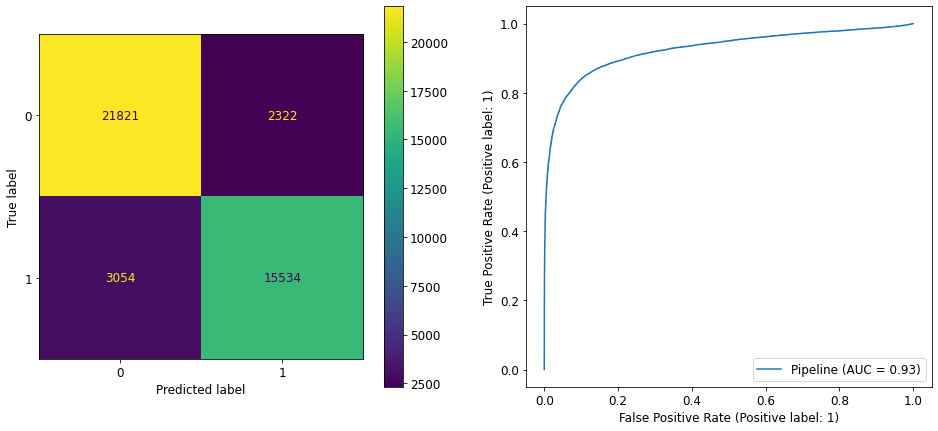

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

lg_reg_model, lg_reg_accuracy, lg_reg_roc_auc = run_model(Pipeline([('scaler', StandardScaler()), ('logistic', LogisticRegression(penalty="elasticnet", l1_ratio=1, solver="saga", random_state=42))]), X_train, X_test, y_train, y_test);

<span style="font-weight: bold;">Let’s now run a grid search, which is a technique for finding the optimal parameter values from a given set of parameters in a grid, to see if tweaking the l1 ratio can help us achieve better performance. </span>

In [33]:
from sklearn.model_selection import GridSearchCV

parameters = {"logistic__l1_ratio": np.arange(0,1.1,0.1)}

gcv = GridSearchCV(estimator=Pipeline([('scaler', StandardScaler()), ('logistic', LogisticRegression(penalty="elasticnet", solver="saga"))]), param_grid=parameters, n_jobs=4)
gcv.fit(X_train, y_train.values.ravel())
print(f"Best L1 regularization rario parameter: {gcv.best_params_}")

Best L1 regularization rario parameter: {'logistic__l1_ratio': 1.0}


<span style="font-weight: bold;">It turns out that our chosen parameter L1 ratio parameter is the best choice for the model. In other words, a full Lasso regression seems to perform better than a mix of, or only Ridge regression.</span>

#### Naive Bayes

Naive Bayes can be used as an alternative to Logistic Regression. Classification is based on the Bayes Theorem, which powers popular models like Google's spam detection - classifying a given incoming email as "Spam" or "Not Spam". The NB model works by calculating the prior probability for a given clas label, finding the likelihood probability with each attribute for each class, putting these values in the Bayes Formula and seeing which class has a higher probability (given the input belongs to the higher probability class) 

Bayes Formula: $$ P(h|D) = \frac{P(D|h)P(h)}{P(D)} $$
Where $P(h)$ is the probability of the hypothesis $h$ being true (regardless of the data). Also known as the prior probability of $h$. $P(D)$ is the probability of the data (regardless of the hypothesis). Also known as prior probability. $P(h|D)$ is the probability of the hypothesis $h$ given the data $D$. Known as the posterior probability. $P(D|h)$ is the probability of data $D$ given that the hypothesis $h$ is trie. Known as the posterior probability.

The `GaussianNB` constructor takes wo paramaters - one is a vector of prior probabilities, and the second is a constant used to smooth calculations. We will let scikit-learn adjust (create) our prior probabilities according to thed data as we are not passing a priors argument to the constructor.

Accuracy:0.8578783552924106, ROC AUC: 0.8531235941297726
              precision    recall  f1-score   support

           0    0.86300   0.88970   0.87614     24143
           1    0.85074   0.81655   0.83329     18588

    accuracy                        0.85788     42731
   macro avg    0.85687   0.85312   0.85472     42731
weighted avg    0.85766   0.85788   0.85750     42731



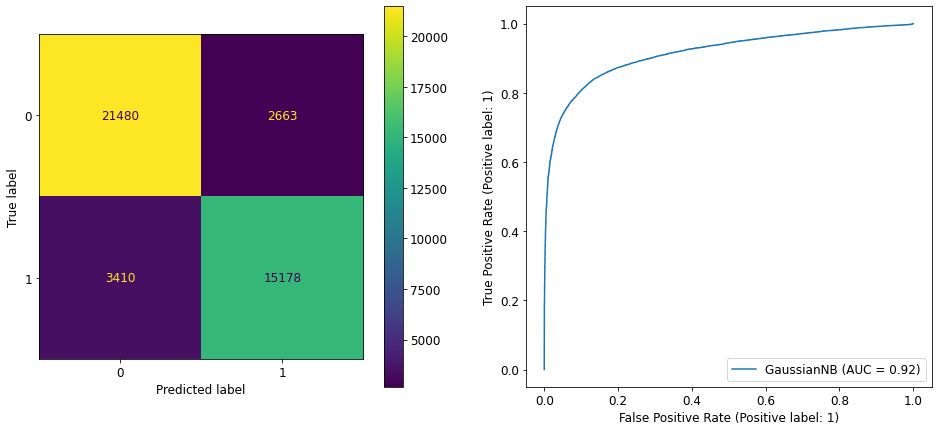

In [34]:
from sklearn.naive_bayes import GaussianNB

nb_model, nb_accuracy, nb_roc_auc = run_model(GaussianNB(), X_train, X_test, y_train, y_test);

We can see that the model does relatively well, with an accuracy of 0.85 and ROC AUC ot 0.92. Which means it is quite accurate and correctly predicts the class of the input vector most of the time. If we compare the performance of the Naive Bayes model to the Logistic Regression model, the performance between the two is quite similar, although the LR model does have a slight edge in terms of accuracy and ROC. This could be due to a number of a reasons, with the main ones being that LR models classify an instance based on linear regression, whilst NB classifiers classify a class based on Bayes Theorem (outlined in the cell above). NB models tends to have higher bias and low variance, LR models tend to have low bias and higher variance, in comparison. NB models suitable for attaining solutions faster with fewer, smaller data sets. With that said, it has been [shown](http://ai.stanford.edu/~ang/papers/nips01-discriminativegenerative.pdf) that as the training set tends towards infinity (read: is bigger), LR models outperform NB models. Crucially, LR models handle multicolliniearity better, whereas NB models expects all features to be independent. These reasons could explain the slight edge our LR model has over NB

#### K-Neighbors

KNN is a non-parametric model which is sometimes used for classification. It classifies by estimating the likelihood that a data point will become a member of one group, or another, based on what group the data points nearest to it belongs to. KNN is a lazy learning algorithm, meaning it doesn't actually do any calculations until it is required to provide a classification - it doesn't build a model until a query is performed on the dataset. That quality makes it relevant for data mining. KNN is also non-parametric, meaning it doesn't make any assumptions about the underlying data distribution. It simply tries to estimate what group/class a data point belongs to by looking at the data points around it. When we say "around it", we mean use a calculation called the Minkowski Distance, which is a generalzation of Euclidean Distance and Manhattan Distance. There are other methods for computing the distance between data points but Minkowski is believed to be a good default choice.

The `KNeighborsClassifier` object can be instantiated with two main options: n_neighbors, which is the number of neighbors to use, and algorithm, which is the specific KNN implementation to use. We are going to use a grid search to find the best configuration for the model. We will try neighbors in the set {1, 3, 5, 7, 9, 11} and try running both "ball_tree" and "kd_tree" algorithms. The reason we try only odd number neighbors is to avoid cases of ties, where we have an even number of neighbors returning two different classes. Having an odd number of neighbors avoids such situations as the odd number neighbor becomes a tie breaker.

Accuracy:0.7514216844913529, ROC AUC: 0.7418196931326644
              precision    recall  f1-score   support

           0    0.76138   0.81568   0.78759     24143
           1    0.73616   0.66796   0.70040     18588

    accuracy                        0.75142     42731
   macro avg    0.74877   0.74182   0.74400     42731
weighted avg    0.75041   0.75142   0.74966     42731

Best fit paramaters: {'algorithm': 'ball_tree', 'n_neighbors': 7}


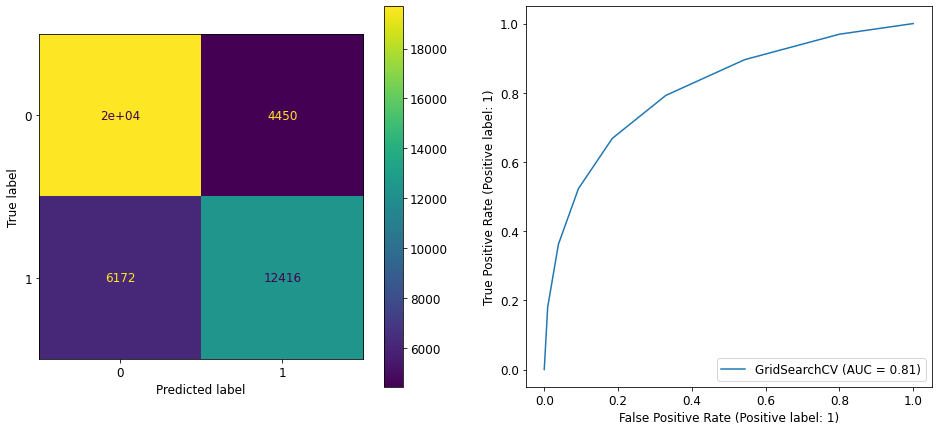

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn_grid_parameters = {"n_neighbors": np.arange(1,12,2), "algorithm": ['ball_tree', 'kd_tree']}
knn_model, kn_accuracy, kn_roc_auc = run_model(GridSearchCV(estimator=KNeighborsClassifier(n_jobs=4), param_grid=knn_grid_parameters, n_jobs=4), X_train, X_test, y_train, y_test)
print(f"Best fit paramaters: {knn_model.best_params_}")

The best fit model is attained by running the ball tree algorithm with 7 neighbors. We can see that the KNN model isn't doing a great job at predicting out passengers' satisfaction, with an accuracy of 0.75 and an ROC AUC of 0.81. This subpar performance can be explained by the lazy nature of the KNN model, as well as it's non-parametric nature. It's ability to correctly classify instances suffers from it's lack of assumption about the underlying data distribution, combined with its lazy evaluation nature. It is also evident that classifying based on proximity of data points to one another isn't as reliable as a parametric approach like Logistic Regression.

#### Decision Tree Classifer

Decision tree is an algorithm which is commonly used for regression nand classification problems. The algorithm uses the training data to create rules which are represented by a tree structure. The decision tree has a root node, internal nodes and leaf nodes. The branches represent the results of the condition and the leaf labels represent the determined class label. To arrive at the classification, we start at the root node, at the top, and work our way down to the leaf node by traversing down the path, basing our decision to go left or right based on the condition which satisfies the predicate at the given node. Decision trees can work with both categorical and numerical data, which means that we wouldn't need to One-Hot encode our data as we did for the Logistic Regression, if we did not want to. But we are sticking with the encoded data for convenience reasons.

How do we determine the predicates for traversal (right or left) at each node? We can use a number of criterions such as Gini, Log-Loss function and Entropy. In our example below, we will try a combination of these parameters to arrive at the best fit. Specifically, we will try tree depths in the range of [2..15], max leaf nodes with no cap, or cap ot [2..12] leaf nodes, and Gini, Entropy and Log-Loss criteria.

Accuracy:0.9542018674966651, ROC AUC: 0.9517094749123249
              precision    recall  f1-score   support

           0    0.94922   0.97088   0.95993     24143
           1    0.96102   0.93254   0.94657     18588

    accuracy                        0.95420     42731
   macro avg    0.95512   0.95171   0.95325     42731
weighted avg    0.95435   0.95420   0.95412     42731

Best fit paramaters: {'criterion': 'gini', 'max_depth': 14, 'max_leaf_nodes': None}


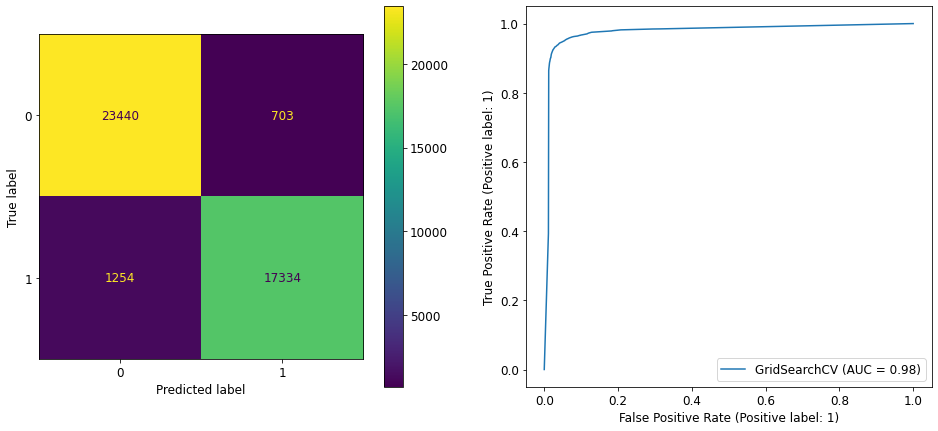

In [36]:
from sklearn.tree import DecisionTreeClassifier

# Grid search for Decision Tree
dtc_grid_parameters = {"max_depth": np.arange(1,15,1), "max_leaf_nodes": [None, 2, 3, 4, 5, 6, 7, 8, 9 ,10, 11,12], "criterion": ["gini", "entropy", "log_loss"]}
dtc_model, dtc_accuracy, dtc_roc_auc = run_model(GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=dtc_grid_parameters, n_jobs=4), X_train, X_test, y_train, y_test)
print(f"Best fit paramaters: {dtc_model.best_params_}")

# Simpler tree (not best fit) visualization purposes
dtc_model_md5, dtc_accuracy_md5, dtc_roc_auc_md5 = run_model(DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10, random_state=42), X_train, X_test, y_train, y_test, False);

We can see that that the best fit is achieved with the Entropy criterion, a max depth of 14, and no cap on the number of leaf nodes. The performance is the best we have seen so far, with an impressive 0.954! The tree does a fantastic job at predicting satisfaction of our passengers. A nice property decision trees have, is that thet are a "white-box" model - we can easily look into the model and infer the classification path. Let's do that below by visualizing the tree. We will not be visualizing the optimal tree described above, as it's quite deep and has many leaf nodes. We will instead visualize a simpler tree with a cap on the number leaf nodes and max depth of 5. That tree has an accuracy of ~0.90 so it's still pretty good, but it's not too complex for visualizaton!

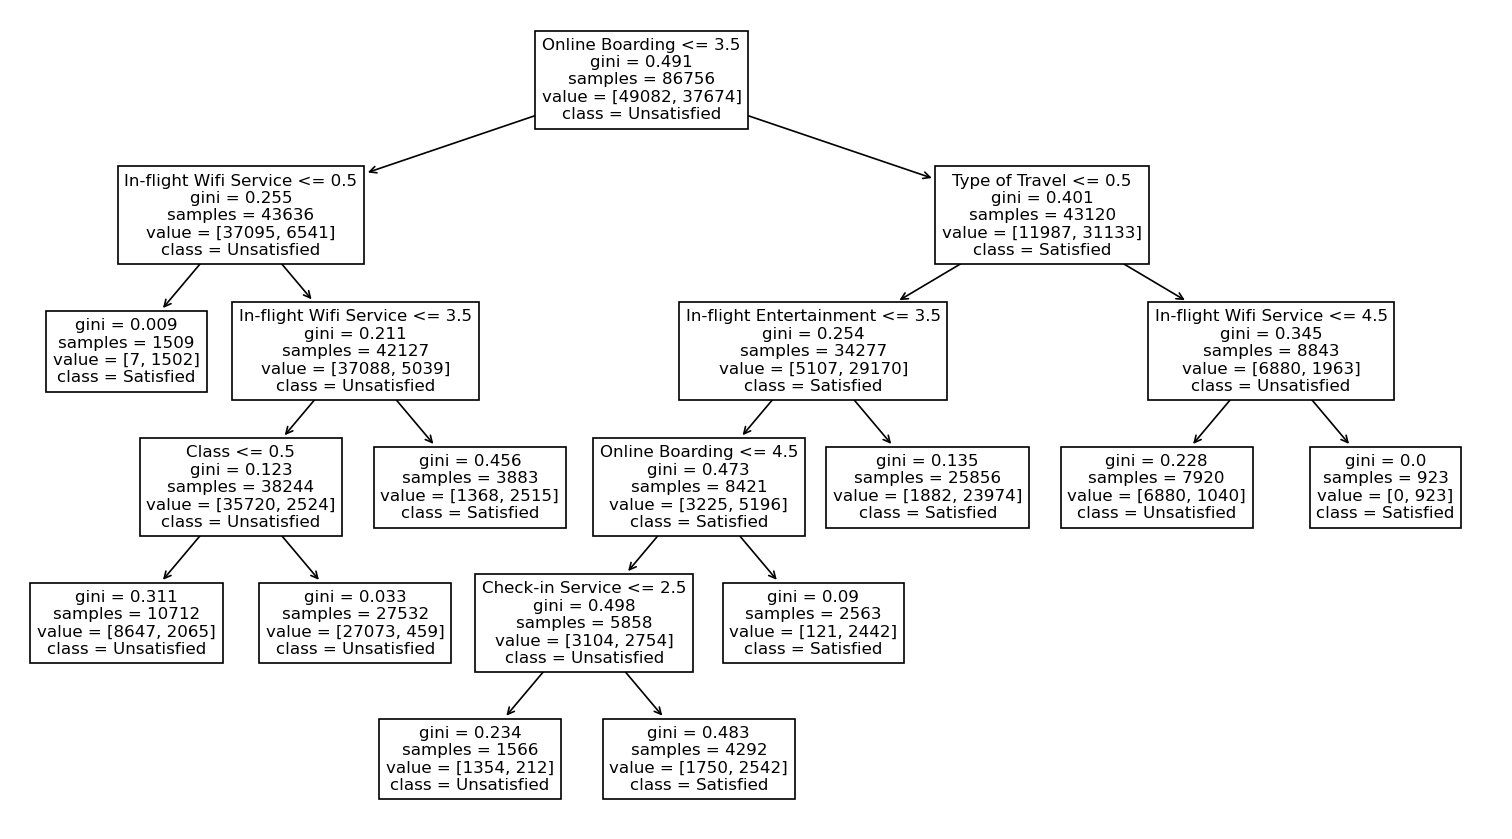

In [37]:
from sklearn import tree
plt.figure(figsize=(16,9), dpi=120)
tree.plot_tree(dtc_model_md5, label='all', feature_names=feature_list, fontsize=10, class_names=["Unsatisfied", "Satisfied"]);

We can see that the root node is "Online Boarding", and from there, as we traverse down, we have two paths to take - "In-Flight Wifi Service" on the left, and "Type of Travel" on the right. At the root node, if our value vector for "Online Boarding" is less than or equal to 3.5, we go to the "In-Flight Wifi Service" node on the left, else "Type of Travel" on the right. Assuming our value vector for "Online Boarding" was 3.4, we traverse left to "In-Flight Wifi Service". At that node, if our value vector for "In-Flight Wifi Service" is less than or equal to 0.5, we arrive at a leaf node and the classifiction of a Satisfied customer!

This decision process is quite intuitive and makes a lot of sernse for predicing whether our customers will be satisfied with our service or not. It also tells us, conretely, what our passengers value the most. This is also why we think the Decition Tree model is performing so well - it follows a very logical path, similar in fashion to the decision process our customers go through. Good online boarding exerpeicne and reliable in-flight wifi seem to be really important to our customers. Note that there are other paths towards Satisfaction we did not elaborate on, but they're all visible above. 

#### Neural Network

Neural Networks models arrive at classification results by ingesting a features vector and putting it through a number of layers, comprised of neurons, which perform an activation function over the weighted sum of their inputs. Neural networks can be shallow of deep, with the deeper networks having multiple inner, or hidden, layers of activation. A typical neuron will have an output value which is equal to the sum of the vector of inputs, time the vector of input weights, put through the activation function. There are a number of activation functions to use, with a common one being 'ReLU', which is essentially a `max` function. Here is an example of the output of a neuron with a ReLU activation function: $$ max(0, \sum_{i=1}^{n} x_{i} \cdot w_{i})$$

We will run a grid search to find the optimal parameters for this model. Initially, we wanted to play with many more variables such as the learning rate, different solvers and other parameters we can configure in the `MPLClassifer` constructor, but the cost of this operation meant that it wasn't feasible to execute on an average machine as the execution time increased to hours rather than single digit minutes. We have chosen to search for the best parameters across the following configurations: 1 hidden layer with 100 neurons, 1 hidden layer with 50 neurons, 3 hidden layers with 100, 50 and 50 neurons respectively, and finally 3 hidden layers with 5, 10 and 5 neurons per layer. We are also testing each of the configurations described above with two different activation functions - $tanh$ and $ReLU$. This gives us $4\cdot2=8$ simulations.

**The simulations below will take a substantial amoune of time to run - around 25 minutes! Therefore, we have commented out the `GridSearchCV` constructor so these simulations are not run again without explicit desire from the user running the notebook. We are, instead, running the optimal model fit based on the results of the grid search from a previous run. The optimal parameters from our search are a ReLU activation function, and a network with three hidden layers of 100, 50 and 50 neurons respectively.**

<span style="color: red">Running the example below will take around 8 minutes</span>

Accuracy:0.9384755797898481, ROC AUC: 0.9411097754902931
              precision    recall  f1-score   support

           0    0.96871   0.92085   0.94417     24143
           1    0.90339   0.96137   0.93148     18588

    accuracy                        0.93848     42731
   macro avg    0.93605   0.94111   0.93783     42731
weighted avg    0.94030   0.93848   0.93865     42731



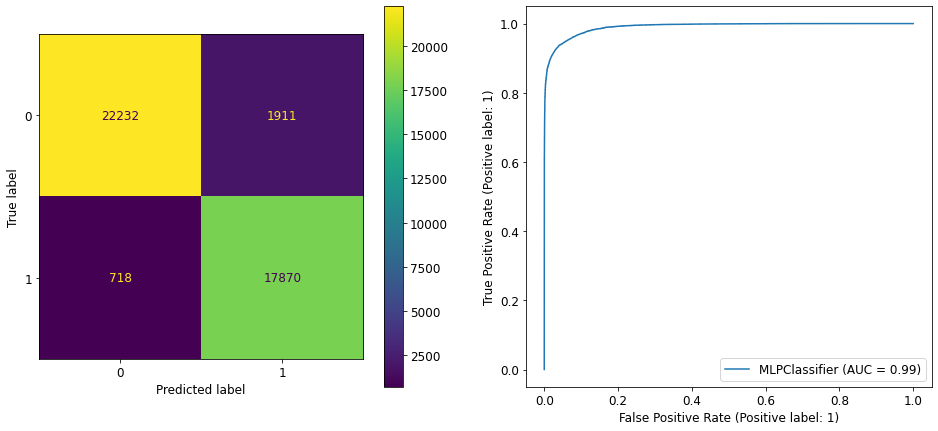

In [38]:
from sklearn.neural_network import MLPClassifier

# Grid search for Neural Network
nn_grid_parameters = {
    "hidden_layer_sizes": [(100, ), (50, ), (100, 50, 50), (5, 10, 5)], 
    "activation": ['tanh', 'relu'], 
}
# Uncomment to run grid search
# nn_model, nn_accuracy, nn_roc_auc = run_model(GridSearchCV(MLPClassifier(random_state=42), param_grid=nn_grid_parameters, n_jobs=4), X_train, X_test, y_train, y_test)
# print(f"Best fit paramaters: {nn_model.best_params_}")

nn_model, nn_accuracy, nn_roc_auc = run_model(MLPClassifier(activation='relu', hidden_layer_sizes=(100, 50, 50), random_state=42), X_train, X_test, y_train, y_test)

The NN model is doing well, and even though neural models are "black box", we can expect some of them to do well for classification especially given the correct configuration, which allows them to learn and compute the optimal weights for determining the class. Doing the grid search was especially important here as it allowed us to find an optimal configuration of the network which maximized the accuracy score. We are sure we could probably attain even higher accuracy had we searched through more parameters, but it was getting quite costly (from a computational perspective) to perform a more exhaustive search, and for a very high accuracy, the marginal cost for a small unit of improvement is probably not worth it.

#### Random Forest

Random Forest is a commonly used machine learning technique that combines the output of multiple decision trees (ensembles) to reach a more accurate and stable prediction. Random forest adds additional randomness to the model while growing the trees. Rather than searching for the most important feature while splitting a node, it searches for the best feature among random subset of features. This results in a wide diversity that generally results in a better model. Therefore in a random forest, only a random subset of features is taken into account by the algorithm splitting a node. 

In our grid search, we use the following parameters:
1. n_estimators, which is the number of trees in the forest. We test the following parameters {80, 90, 100 ,110, 120}.
2. max_features, which is the number of features to consider when looking for the best split. Decided by a function which takes $n$ features as an input to a function from ["sqrt", "log2", None]

We did not find any material improvement over the default parameters of 100 estimators with "sqrt" max features, so we have commented the grid search out, but kept it for reference.

Accuracy:0.9630713065455992, ROC AUC: 0.960623072637792
              precision    recall  f1-score   support

           0    0.95625   0.97946   0.96771     24143
           1    0.97245   0.94179   0.95687     18588

    accuracy                        0.96307     42731
   macro avg    0.96435   0.96062   0.96229     42731
weighted avg    0.96329   0.96307   0.96300     42731



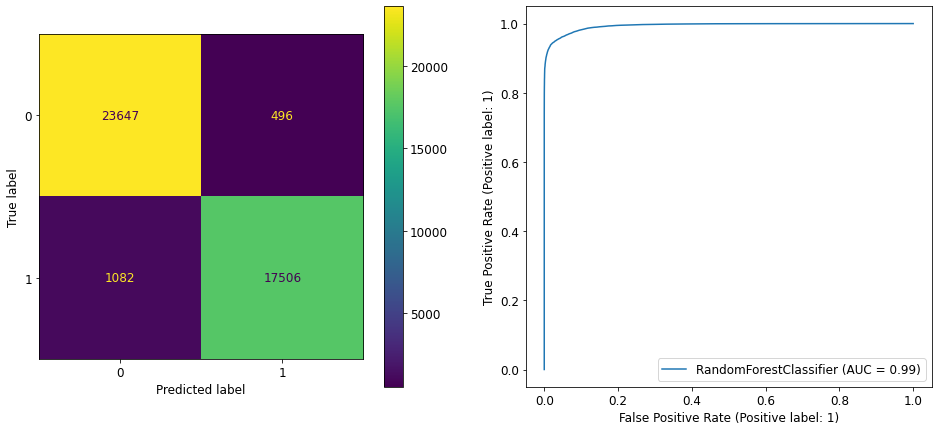

In [39]:
from sklearn.ensemble import RandomForestClassifier

# Grid search - uncomment if needed
# rf_grid_parameters = {"n_estimators": np.arange(80, 130, 10), "max_features": ["sqrt", "log2"], "criterion": ["gini", "entropy", "log_loss"]}
# rf_model, rf_accuracy, rf_roc_auc = run_model(GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=rf_grid_parameters, n_jobs=4), X_train, X_test, y_train, y_test)
# print(f"Best fit paramaters: {rf_model.best_params_}")
# Best fit paramaters: {'criterion': 'log_loss', 'max_features': 'log2', 'n_estimators': 120}

rf_model, rf_accuracy, rf_roc_auc = run_model(RandomForestClassifier(n_estimators=100, random_state=42), X_train, X_test, y_train, y_test, True);

It looks like we have a winner! So far, Random Forest has the highest accuracy and highest ROC AUC of the models we have looked at, with 0.963 and 0.960, respectively. This means that it does a spectacular job at predicting the class most of the time when compared to other models we have looked at, such as Logistic Regression, which can be prone to overfitting
We have decided to implement Random Forest in our analysis due to its ease of use and flexibility, as it handles both classification and regression problems. Also, Random Forest eliminates the limitation of the decision tree algorithm, which can be prone to overfitting, and increases precision. It solves the problem of overfitting because output is based on majority voting or averaging. The testing performance of Random Forests does not decrease (due to overfitting) as the number of trees increases. Hence after a certain number of trees, the performance tends to stay a certain value. Given how well our `DecisionTreeClassifer` did, seeing an ensemble of trees outperform a single tree classifier makes sense intuitively, and it is satifying to see our Random Forest classifer doing so well.  

#### Adaptive Boosting

Adaptive Boosting (or AdaBoost) is a popular ensemble technique in Machine Learning that aims to improve prediction power by boosting our weak learners (“stumps”) based on their mistakes, each time improving on the weaknesses of its predecessors so together they are one strong ensemble model. Some stumps get more say in classification than others (some stumps do a better job classifying our data than other stumps in our ensemble and hence given more weights), while taking the previous stump’s mistakes into account. It is best used to boost the performance of decision trees on binary classification problems, which is what we have in our dataset, and the reason for its use in our analysis.
The AdaBoostClassifier constructor takes five parameters – 1) base_estimator, which is the base estimator from which the boosted ensembe is built; 2) n_estimators, which is the maximum estimators at which boosting is terminated; 3) learning_rate, which is the weight applied to each classifier at each boosting iteration; 4) algorithm used; 5) random_state, which controls the random seed given at each base_estimator at each boosting iteration. Scikit-learn has really good default parameters for these, and in our grid search we were able to improve on it only slightly at 0.2%. Details of the parameters used are given in the code snippet below.


Accuracy:0.9307762514333856, ROC AUC: 0.9288126300326204
              precision    recall  f1-score   support

           0    0.93424   0.94392   0.93906     24143
           1    0.92616   0.91371   0.91989     18588

    accuracy                        0.93078     42731
   macro avg    0.93020   0.92881   0.92947     42731
weighted avg    0.93073   0.93078   0.93072     42731



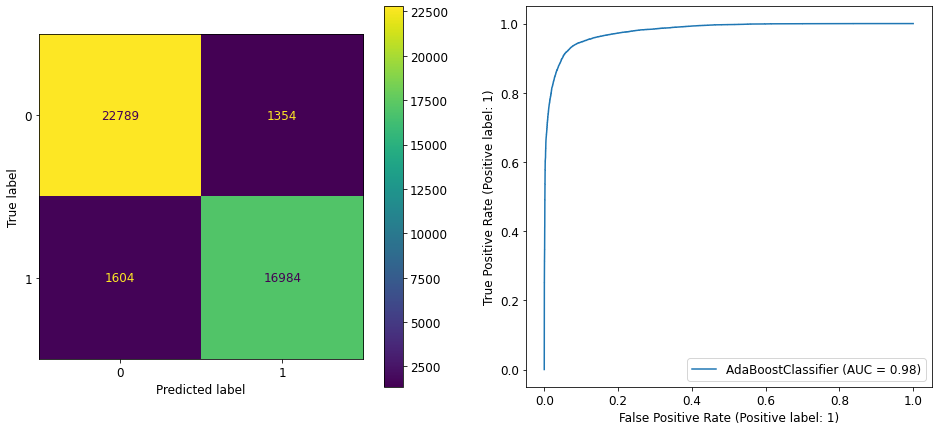

In [40]:
from sklearn.ensemble import AdaBoostClassifier

# Grid search - uncomment if needed
# abc_grid_parameters = {"n_estimators": np.arange(80, 130, 10), "learning_rate": np.linspace(0.5, 1.5, 5)}
# abc_model, abc_accuracy, abc_roc_auc = run_model(GridSearchCV(estimator=AdaBoostClassifier(random_state=42), param_grid=abc_grid_parameters, n_jobs=4), X_train, X_test, y_train, y_test)
# print(f"Best fit paramaters: {abc_model.best_params_}")
# Best fit paramaters: {'learning_rate': 0.75, 'n_estimators': 120}

abc_model, abc_accuracy, abc_roc_auc = run_model(AdaBoostClassifier(learning_rate=0.75, n_estimators=120, random_state=42), X_train, X_test, y_train, y_test, True);

We can see that Adaptive Boosting does a spectacular job at predicting the customer satisfaction. We can see that the accuracy score is 0.931 and the ROC AUC score is 0.929, which is not quite as good as the results we see with Decision Tree and Random Forest but better than some of the other ones such as Logistic Regression, Naïve Nayes, and KNN.
The reason why Boosting is a good technique to use is because it reduces bias as well as variance for supervised learning. It works on the simple principle of learners “growing” from previous weak learners. Since incorrectly classified instances are fed as input for the next model, and the process is repeated until specified conditions are met, AdaBoost is a great tool to use when we have weak learners. For out dataset, the perofrmance between AdaBoost and Random Forest is compartable, which makes sense intuitively as both are ensemble methods. One thing which could explain the edge our Random Forest has on our AdaBoost algorithm, is that in the RF, each tree has an equal vote on the final classification of the instance, whereas in AdaBoost some stumps get a higher weight when it comes to the final decision of the classification, and given given stumps are bootstrapped, any errors made by the first stump will affect errors made by the second stump, and so on and so forth. It therefore means that we could potentially, depending on the sampling, end up with a slightly less accuracy in AdaBoost compared to Random Forest. But as we can see, both perform exceptionally well.


#### Comparison of Model Performance

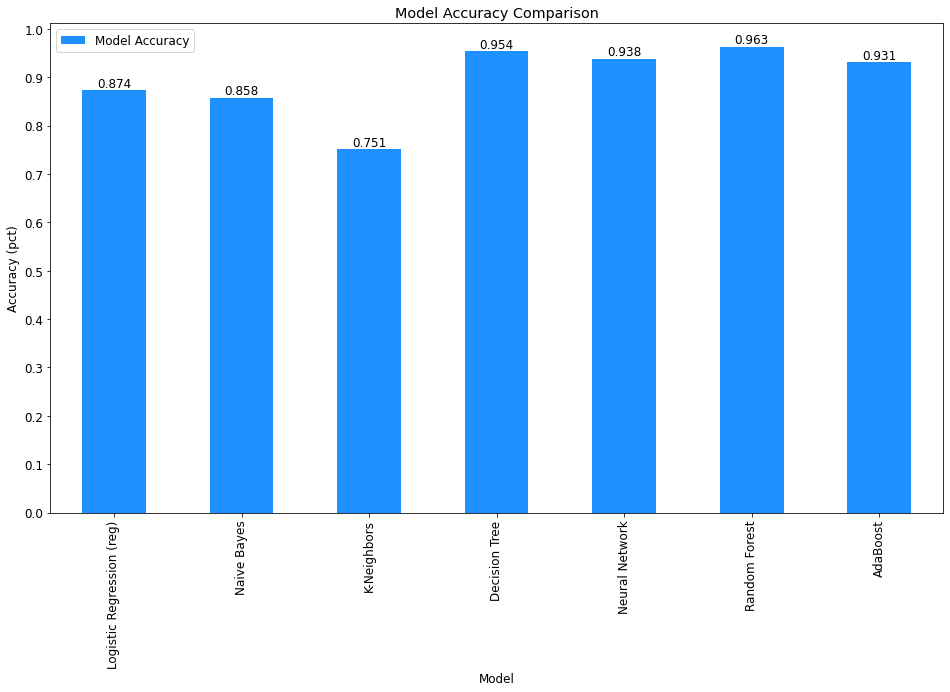

In [41]:
model_names = ["Logistic Regression (reg)", "Naive Bayes", "K-Neighbors", "Decision Tree", "Neural Network", "Random Forest", "AdaBoost"]
model_accuracies = [lg_accuracy, nb_accuracy, kn_accuracy, dtc_accuracy, nn_accuracy, rf_accuracy, abc_accuracy]
accu_df = pd.DataFrame(index=["Model Accuracy"], data={e[0]:e[1] for e in zip(model_names, model_accuracies)})

ax = accu_df.T.plot(kind="bar", figsize=(16,9), color=["dodgerblue"], ylabel="Accuracy (pct)", title="Model Accuracy Comparison", xlabel="Model", yticks=np.arange(0,1.1,0.1))
ax.legend(loc='upper left')
for container in ax.containers:
    ax.bar_label(container, fmt="%.3f")

Based on the bar graph above, the Random Forest performed the best in terms of Accuracy- 96.3%. We believe that Random Forest turned out to be the best model for our dataset because it reduces overfitting that occurs in Decision Trees, which happens to be the 2nd highest in terms of accuracy.

## IV: Landing (Description of challenges/obstacles faced)

No flight is ever smooth. During our flight, we encountered a couple of “turbulence”.
There were 393 records in the dataset in which we had missing records. With the mindset of having as many data points as possible, we wanted to preserve all the instances in the original dataset. However, we as a team looked at the data and determined that the number of missing records is immaterial given the total number of records, which is 129,880, or .30%. Thus, we excluded the missing records from our dataset.
Also, we faced the issue that our data is mainly “categorical” in nature. Most of the features in our dataset consist of integers that range from 1-5. Consequently, it limited our ability to do even more exploratory data analysis. We have therefore tried to focus, especially with the scatter chart, on analysis of continuous features such as Age, Flight Distance and Delays.

Once we got to the training part, we encountered some difficulties in determining, where appropriate, the optimal hyperparameter values for the different models. Initially, we experimented with the parameters in a manual fashion, but this became impractical as we moved on to more sophisticted models, such as NN, with many paramaters. That's when we turned to a standardised grid search approach where the parameters are delcared in advance and applied systematically by scikit-learn as a part of the model train/fit process - we also applied this process to all other models, restrospectively. Execution time was also an issue, as we got into the more sophisticated algorithms which used CPU intensive algorithms such as gradient descent. 

Before settling on which models to train, we had to go back to the dataset, evaluate our primary objective of classification, and come up with a shortlist of appropriate models for the binomial classification problem we were trying to solve. The process of shortlisting these models involved researching (also recalling all the models we have covered in the span of this course) and deciding on a good balance of quality models vs quantity, to be presented in this notebook. This process of elimination was challenging as we wanted to be comprehensive and capture as much of course's content in our choice of models, whilst not overdoing it with redundant modeling that is not appropriate for our task.

## V: Arrival (Potential Next Steps/Future Direction

For our task of classification, the facilities provided by `scikit-learn` were adequate as we were able to achieve very high accuracy with non-NN models. With that said, the one instance where we did try to use a NN, we found the calculations to be quite slow to execute. This was a consious decision, given the focus was not on predicting with NNs. With that said, we would like to extend our analysis by exploring additional deep learning libraries such as TensorFlow or Keras - not only for the added benefit of lower level being writtend in C/C++, but also for the utilization of GPU resources, where available. Another interesting next step in our analysis would be to take the satisfaction dataset we have here, and try to consolidate it with another dataset which includes pricing, airline names, and maybe even other data such as airplane model and make. If, for example, we could find a way to correlate the satisfaction dataset with specific airport names, and depatrure time and date, we would, potentially, have enough context such that we could even combine that analysis with alternative data sets such as satellite images of the airports and surrounding areas at the time and date of departure, use CNNs for the image classificiation of "Delay" vs "No Delay" (powered by a library such Gluon), and try to combine both models to create even more accurate predictors of satsifaction, price and delays. 

Thank you for staying with us through our voyage of data exploration and modeling. We hope you had an enjoyable journey. Godspeed. 